In [115]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [116]:
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

In [117]:
# Import the dataset
mnist = learn.datasets.load_dataset('mnist')
# Just download 4 files manually from: http://yann.lecun.com/exdb/mnist/ 
# and put them to /MNIST-data
# Extracting MNIST-data\train-images-idx3-ubyte.gz
# Extracting MNIST-data\train-labels-idx1-ubyte.gz
# Extracting MNIST-data\t10k-images-idx3-ubyte.gz
# Extracting MNIST-data\t10k-labels-idx1-ubyte.gz

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [118]:
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

In [119]:
# 28x28 pixels = 784 features
test_data[9999].size

784

In [120]:
test_data[9999]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03137255, 0.45882

In [121]:
test_labels[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

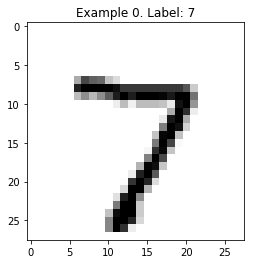

In [122]:
# limit size of datasets for a faster experiment
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

def display(i):
    """
    Display example digits
    :param i: example number (not the label)
    """
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28, 28)), cmap=plt.cm.gray_r)


display(0)  # display example 0, label 7

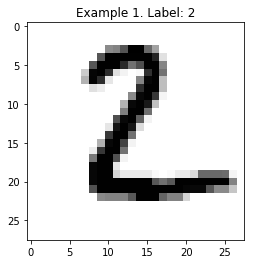

In [123]:
display(1)  # display example 1, label 2

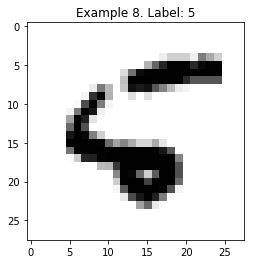

In [124]:
display(8)  # display example 8, label 5

In [125]:
# fit a linear classifier
feature_columns = learn.infer_real_valued_columns_from_input(data)
#feature_columns = [tf.feature_column.numeric_column(str(k)) for k in range(1,785)]

In [126]:
feature_columns

[_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)]

In [127]:
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)

In [128]:
classifier.fit(data, labels, batch_size=100, steps=1000)

TypeError: Expected string passed to parameter 'tags' of op 'ScalarSummary', got 'loss' of type 'str' instead.

In [ ]:
# evaluate linear classifier accuracy
classifier.evaluate(test_data, test_labels)
print(classifier.evaluate(test_data, test_labels)["accuracy"])

# classify some examples
# this will be classified correctly:
# print("Predicted %d, Label: %d" % (classifier.predict(test_data[0]), test_labels[0]))
display(0)
#
# # this will be classified incorrectly:
# print("Predicted %d, Label: %d" % (classifier.predict(test_data[8]), test_labels[8]))
display(8)

# visualize learned weights
weights = classifier.get_variable_value("linear//weight/d/linear//weight/part_0/Ftrl_1")
f, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28, 28), cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(())  # ticks be gone
    a.set_yticks(())
plt.show()